In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('train.csv')
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [3]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()   

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
 df.sort_values(by='Age', ascending=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# create a new column with the title of the person
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [8]:
# check the title of the person and the missing age
title_comparison = pd.DataFrame({
    'Total': df['Title'].value_counts(),
    'Missing Age': df[df['Age'].isnull()]['Title'].value_counts()
})

print(title_comparison)

              Total  Missing Age
Title                           
Capt              1          NaN
Col               2          NaN
Don               1          NaN
Dr                7          1.0
Jonkheer          1          NaN
Lady              1          NaN
Major             2          NaN
Master           40          4.0
Miss            182         36.0
Mlle              2          NaN
Mme               1          NaN
Mr              517        119.0
Mrs             125         17.0
Ms                1          NaN
Rev               6          NaN
Sir               1          NaN
the Countess      1          NaN


In [9]:
# Group rare titles into one group
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Jonkheer', 'Don', 'Sir', 'Capt', 'Lady', 'the Countess', 'Dona', 'Mlle', 'Mme'], 'Rare')

# Calculate median ages for each title group
title_age_median = df.groupby('Title')['Age'].median()
title_age_median

df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [10]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
# # Filling missing Age with median
# df['Age'].fillna(df['Age'].title_age_median[df['Title']], inplace=True)

# Create a new colum for has_cabin
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Create a new colum for family size
df['family_size'] = df['SibSp'] + df['Parch'] + 1


In [12]:
# extract cabin letter for deck
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

In [13]:
df['Age_cat'] = df['Age'].apply(lambda x: 'Kid' if x <= 15 else ('Adult' if x <= 60 else 'Elderly'))


In [14]:
df['Age_cat'].value_counts()


Age_cat
Adult      782
Kid         87
Elderly     22
Name: count, dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df_bar = pd.DataFrame([survived,dead])
    df_bar.index = ['Survived','Dead']
    df_bar.plot(kind='bar',stacked=True, figsize=(10,5))

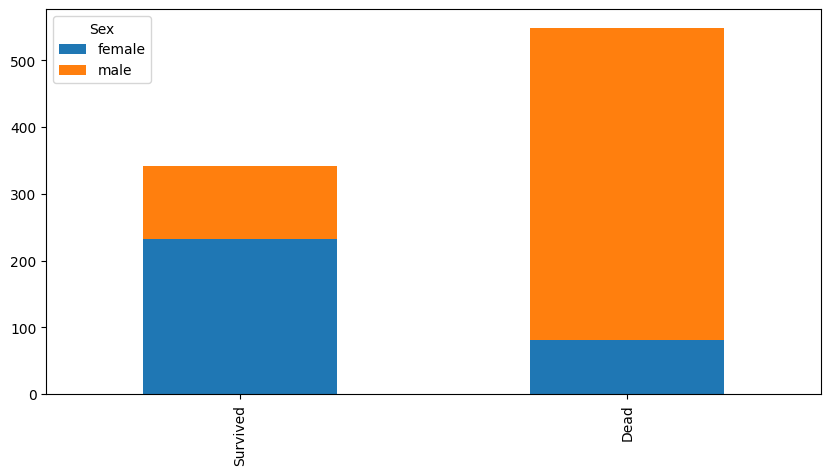

In [16]:
bar_chart('Sex')

The chart confirms that Females are most likely to survive

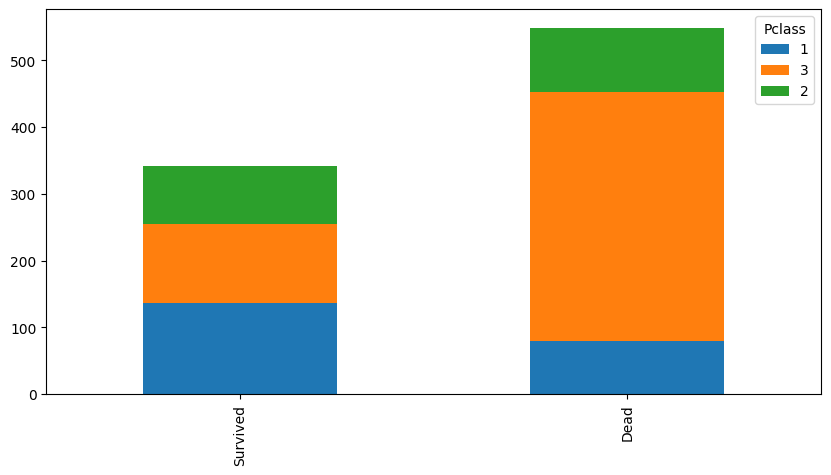

In [17]:
bar_chart('Pclass')

The chart confirms that 1st class passengers are more likely to survive while 3rd class passengers are more likely to die 

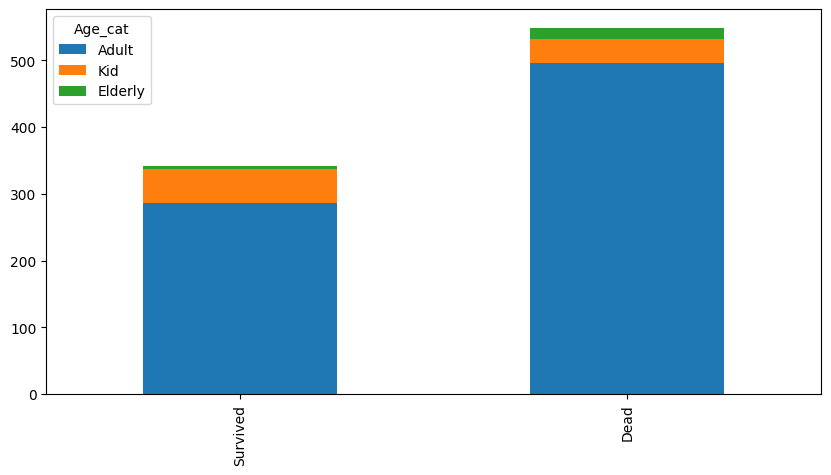

In [18]:
bar_chart('Age_cat')

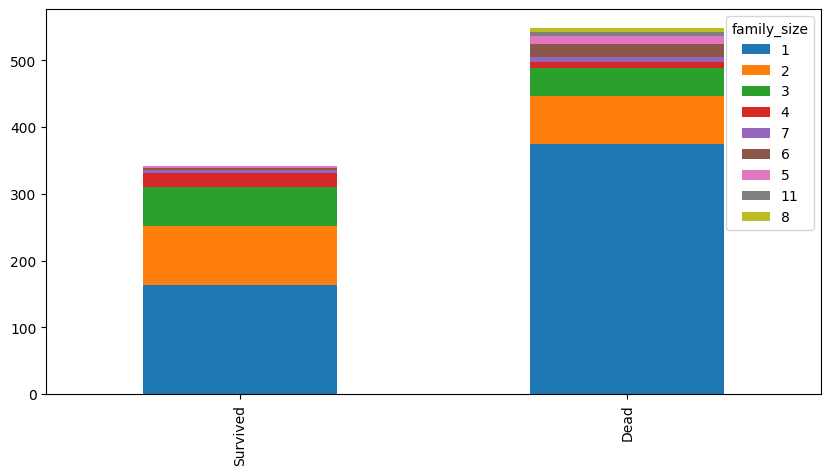

In [19]:
bar_chart('family_size')

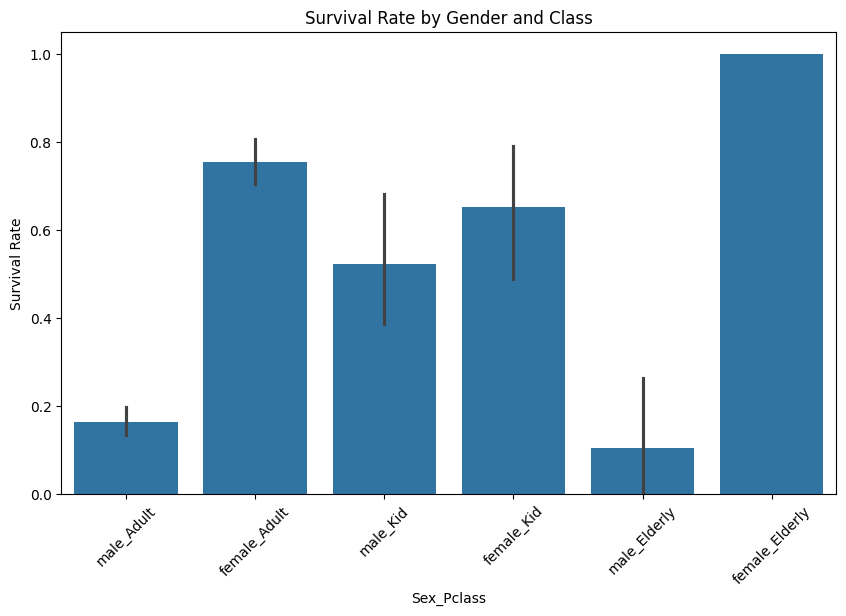

In [20]:
# create a combined feature for gender and class
df['Sex_Pclass'] = df['Sex'] + '_' + df['Age_cat'].astype(str)

# Plot survival rate by gender and class
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex_Pclass', y='Survived', data=df)
plt.title('Survival Rate by Gender and Class')
plt.ylabel('Survival Rate')
plt.xlabel('Sex_Pclass')
plt.xticks(rotation=45)
plt.show()

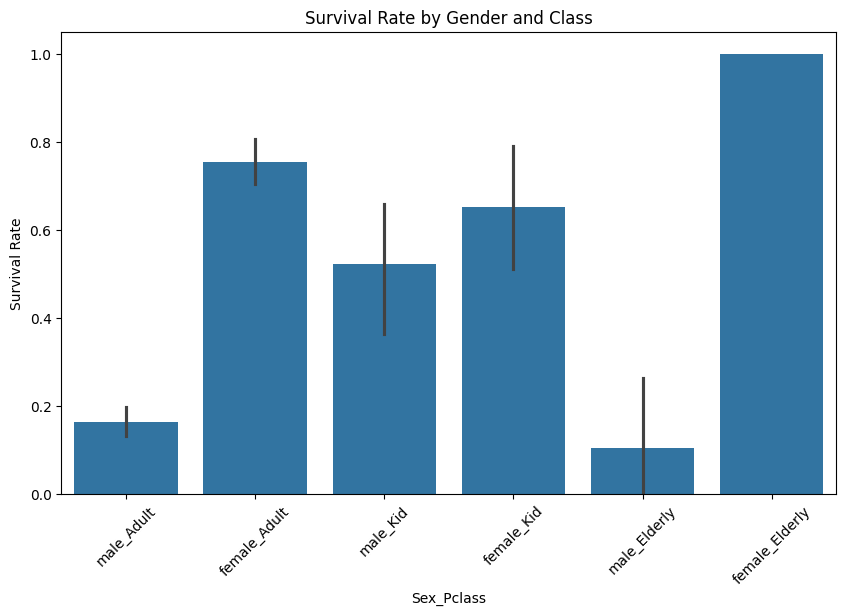

In [21]:
# create a combined feature for gender and class
df['Sex_Age_cat'] = df['Sex'] + '_' + df['Age_cat'].astype(str)

# Plot survival rate by gender and class
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex_Pclass', y='Survived', data=df)
plt.title('Survival Rate by Gender and Class')
plt.ylabel('Survival Rate')
plt.xlabel('Sex_Pclass')
plt.xticks(rotation=45)
plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

df['Sex_bin'] = df['Sex'].map({'male' : 1, 'female' : 0})
Bt_features = ['Pclass', 'Age', 'Sex_bin' ] 
X = df[Bt_features]
y = df['Survived']  

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

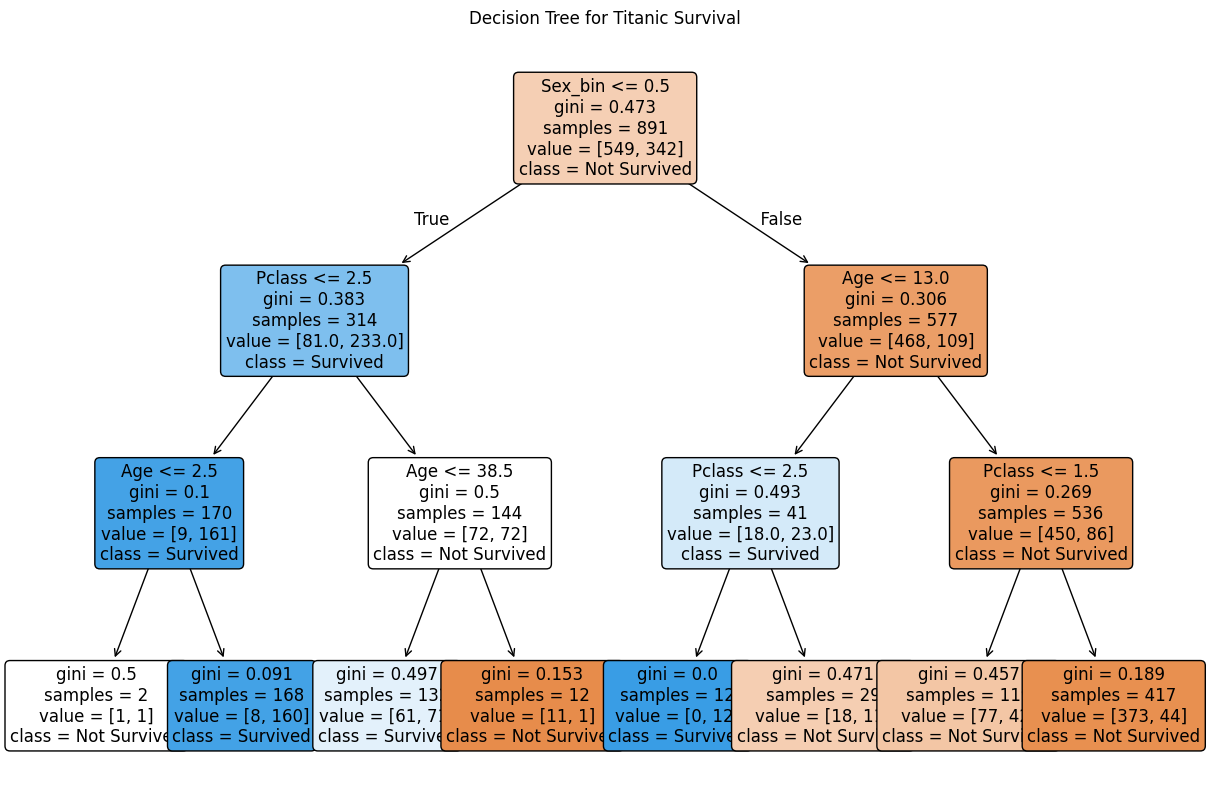

In [31]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=Bt_features, class_names=['Not Survived', 'Survived'], 
          filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree for Titanic Survival')
plt.show()

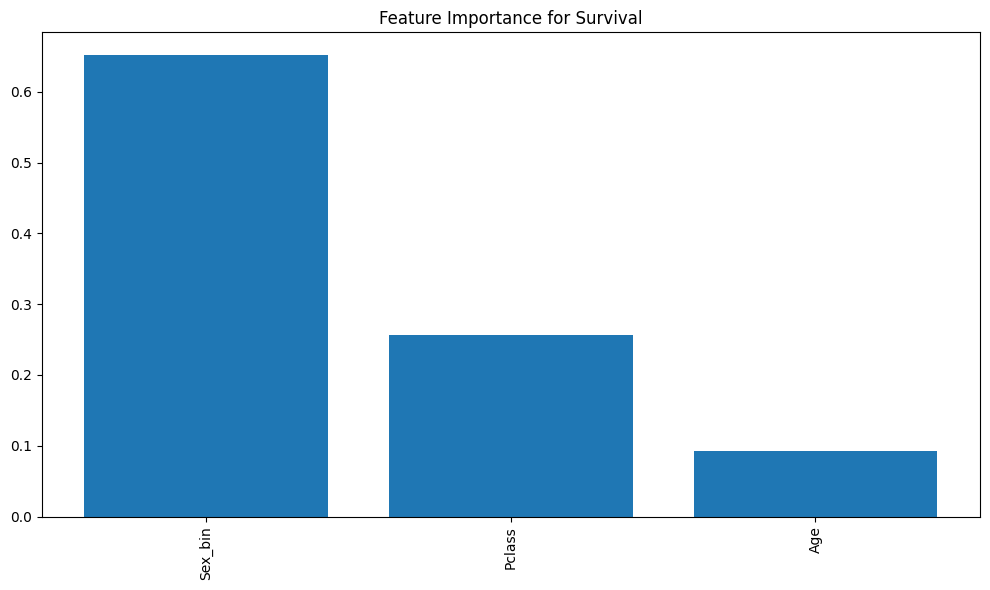

In [36]:
# Feature importance
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importance for Survival')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [Bt_features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()
